In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# pandas=[]
# with open('data.csv','r', newline= "") as x :
#     reader = csv.DictReader(x)
#     for i in reader:
#         pandas.append(dict(i))

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df.replace({'':np.NaN},inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [11]:
df.info()

NameError: name 'df' is not defined

In [6]:
dfInfo = pd.DataFrame({
    'columnType' : [col for col in df.dtypes],
    'nullValues (nb)' : [null for null in df.isnull().sum()],
    'nullValues (%)' : [null for null in (df.isnull().sum()/df.shape[0])*100]
}).T.rename(columns={key:val for key,val in enumerate(df.columns)})
# dfInfo = dfInfo(set_index= df.columns)
dfInfo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
columnType,object,object,object,int64,datetime64[ns],float64,object,object
nullValues (nb),0,0,1454,0,0,0,135080,0
nullValues (%),0,0,0.268311,0,0,0,24.9267,0


In [7]:
df = df.dropna(axis=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
dfInfo = pd.DataFrame({
    'columnType' : [col for col in df.dtypes],
    'nullValues (nb)' : [null for null in df.isnull().sum()],
    'nullValues (%)' : [null for null in (df.isnull().sum()/df.shape[0])*100]
}).T.rename(columns={key:val for key,val in enumerate(df.columns)})
# dfInfo = dfInfo(set_index= df.columns)
dfInfo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
columnType,object,object,object,int64,datetime64[ns],float64,object,object
nullValues (nb),0,0,0,0,0,0,0,0
nullValues (%),0,0,0,0,0,0,0,0


In [9]:
df[df.duplicated()==True]
df.duplicated().sum()

5225

In [10]:
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [11]:
print('Daftar negara yang membuat transaksi :',df.nunique()['Country'])

Daftar negara yang membuat transaksi : 37


In [12]:
a = 0
listTotal = []
listCountry = []
listPct = []
for i,item in enumerate(df['Country'].unique()):
    listTotal.append(df[(df['Country']== item ) & True].shape[0])
    a = a + df[(df['Country']== item ) & True].shape[0]
    listCountry.append(item)
    listPct.append(round((listTotal[i]/df.shape[0])*100,2))
#     dicts = {key:val for key,val in zip(listCountry,listTotal)}
#     listTotal = []
#     listCountry = []
#     listDict.append(dicts)


print("""Jumlah Negara yang bertransaksi : Total Transaksi {}

{}""".format(a,pd.DataFrame({'Negara' : df['Country'].unique(),'Total Customer' : listTotal,'Percentage' : listPct})))
df.shape

Jumlah Negara yang bertransaksi : Total Transaksi 401604

                  Negara  Total Customer  Percentage
0         United Kingdom          356728       88.83
1                 France            8475        2.11
2              Australia            1258        0.31
3            Netherlands            2371        0.59
4                Germany            9480        2.36
5                 Norway            1086        0.27
6                   EIRE            7475        1.86
7            Switzerland            1877        0.47
8                  Spain            2528        0.63
9                 Poland             341        0.08
10              Portugal            1471        0.37
11                 Italy             803        0.20
12               Belgium            2069        0.52
13             Lithuania              35        0.01
14                 Japan             358        0.09
15               Iceland             182        0.05
16       Channel Islands             757 

(401604, 8)

In [13]:
Table = pd.DataFrame({
    'products' : [df['StockCode'].nunique()],
    'transaction' : [df['InvoiceNo'].nunique()],
    'customers' : [df['CustomerID'].nunique()]
}).rename(index={0:'quantity'})
# Table = Table(set_index= 'quantity')
Table

,products,transaction,customers
quantity,3684,22190,4372


In [14]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
temp = temp.rename(columns={'InvoiceDate':'Number of Product'})
temp.head()

,CustomerID,InvoiceNo,Number of Product
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


In [15]:
print(df[(df['CustomerID'] == '12347') & (df['InvoiceNo']=='537626')].shape)
df[(df['CustomerID'] == '12347') & (df['InvoiceNo']=='537626')].head()

(31, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland


In [16]:
temp['order canceled'] = temp['InvoiceNo'].apply(lambda x: int('C' in x))
display(temp.head())
print('Jumlah order yang di cancel :',temp['order canceled'].sum())

,CustomerID,InvoiceNo,Number of Product,order canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


Jumlah order yang di cancel : 3654


In [17]:
df.sort_values('CustomerID').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland


In [18]:
df_check = df[df['Quantity'] < 0][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice']]
for item in df_check.index:
    if df[(df['CustomerID'] == df_check.loc[item,'CustomerID']) & (df['Quantity'] == -int(df_check.loc[item,'Quantity'])) & (df['Description'] == df_check.loc[item,'Description'])].shape[0] == 0: 
        print(df_check.loc[item])
        break

InvoiceNo       C536379
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


In [19]:
df_check2 = df[(df['Quantity'] < 0)&(df['Description']!='Discount')][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice']]
for item in df_check.index :
    if df[(df['CustomerID'] == df_check.loc[item,'CustomerID']) & (df['Quantity'] == -int(df_check.loc[item,'Quantity'])) & (df['Description'] == df_check.loc[item,'Description'])].shape[0] == 0:
        print(df_check.loc[item])
        break

InvoiceNo       C536379
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


In [20]:
df[(df['CustomerID']=='15311')&(df['Description']=='SET OF 3 COLOURED  FLYING DUCKS')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom


In [21]:
df_check2.head()

,InvoiceNo,CustomerID,Quantity,StockCode,Description,UnitPrice
154,C536383,15311,-1,35004C,SET OF 3 COLOURED FLYING DUCKS,4.65
235,C536391,17548,-12,22556,PLASTERS IN TIN CIRCUS PARADE,1.65
236,C536391,17548,-24,21984,PACK OF 12 PINK PAISLEY TISSUES,0.29
237,C536391,17548,-24,21983,PACK OF 12 BLUE PAISLEY TISSUES,0.29
238,C536391,17548,-24,21980,PACK OF 12 RED RETROSPOT TISSUES,0.29


In [22]:
dfCleaned = df.copy()
df['Quantity'] = df['Quantity'].astype('int64')
dfCleaned['QuantityCanceled'] = 0
dfCleaned.head()

counterpart = []
nocounterpart = []
for index, col in  df.iterrows():
#     print(index)
#     print(df['CustomerID'].dtypes)
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
    if (df_test.shape[0] == 0): 
#         print(df_test.shape[0])
        nocounterpart.append(index)
#         print(doubtfullData)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        dfCleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        counterpart.append(index)
#         print('ini remove',remove)
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if int(val['Quantity']) < -col['Quantity']: continue
            dfCleaned.loc[index, 'QuantityCanceled'] = -col['Quantity']
            counterpart.append(index) 
            break

In [23]:
print("counterpart: {}".format(len(counterpart)))
print("nocounterpart: {}".format(len(nocounterpart)))

counterpart: 7521
nocounterpart: 1226


In [24]:
dfCleaned.drop(counterpart, axis = 0, inplace = True)
dfCleaned.drop(nocounterpart, axis = 0, inplace = True)
remaining_entries = dfCleaned[(dfCleaned['Quantity'] < 0) & (dfCleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [25]:
#Menyimpan file yang telah di cleaning
dfCleaned.to_csv('dfCleaned.csv')

In [3]:
dfCleaned = pd.read_csv('dfCleaned.csv', index_col = False)
dfCleaned = dfCleaned.drop('Unnamed: 0',axis='columns')
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


In [137]:
listSpecialCode = dfCleaned[dfCleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
listSpecialCode

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [138]:
for code in listSpecialCode:
    print("{:<15} -> {:<30}".format(code, dfCleaned[dfCleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [139]:
for i in listSpecialCode:
    dfCleaned = dfCleaned.drop(dfCleaned[dfCleaned['StockCode']==i].index,axis=0)

In [140]:
dfCleaned['TotalPrice'] = dfCleaned['UnitPrice'] * (dfCleaned['Quantity'] - dfCleaned['QuantityCanceled'])
# dfCleaned.sort_values('CustomerID')[:5]
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


In [141]:
dfCleaned[dfCleaned['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
6746,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0,0.0
22103,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0,0.0
24901,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0,0.0
28591,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0,0.0
28593,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0,0.0


In [142]:
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

In [143]:
#___________________________________________
# somme des achats / utilisateur & commande
temp = dfCleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
#_____________________
# date de la commande
dfCleaned['InvoiceDate_int'] = dfCleaned['InvoiceDate'].astype('int64')
temp = dfCleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
dfCleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# selection des entrées significatives:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID').head()

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000


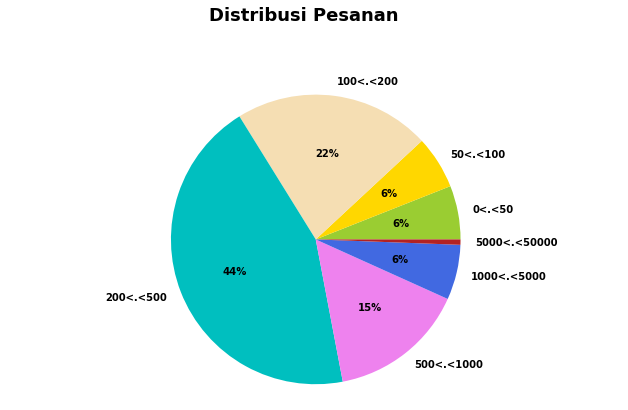

In [144]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribusi Pesanan", ha='center', fontsize = 18)
plt.show()

Text(0.5, 1.0, 'Revenue per Country')

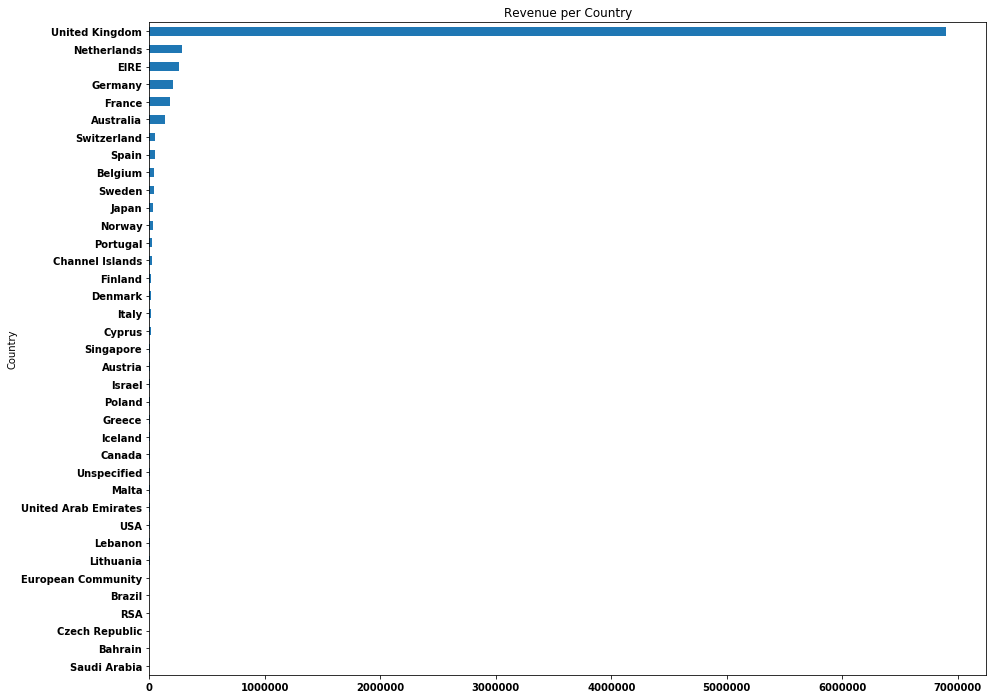

In [145]:
revenue_per_countries = dfCleaned.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_countries.plot(kind='barh', figsize=(15,12))
plt.title("Revenue per Country")

Text(0.5, 1.0, 'Number of Invoices per Country')

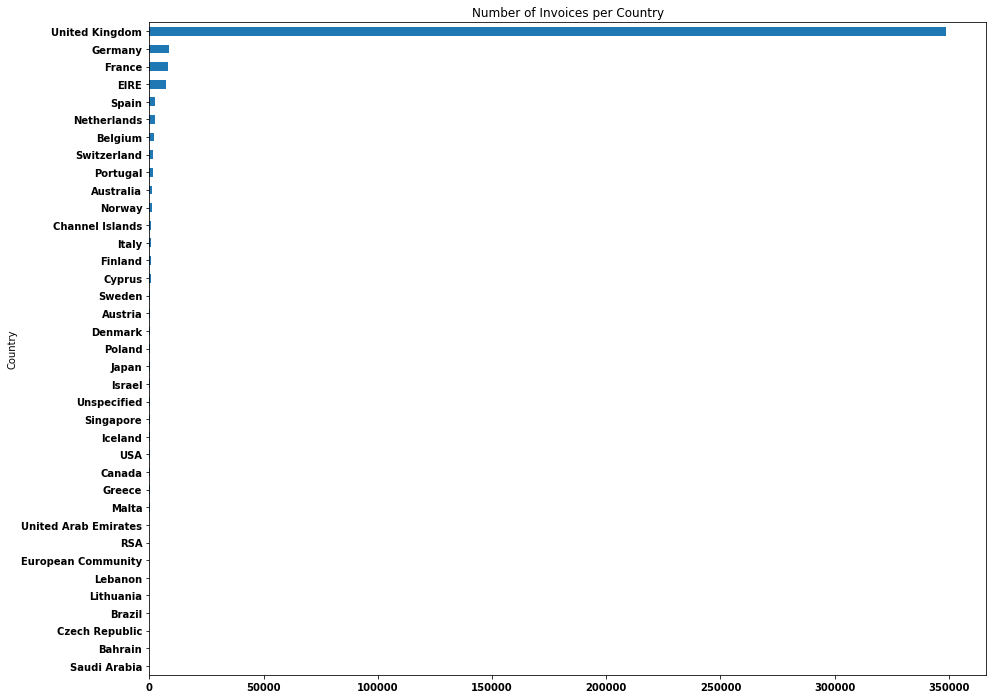

In [146]:
No_invoice_per_country = dfCleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='barh', figsize=(15,12))
plt.title("Number of Invoices per Country")

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dfCleaned['Country'])

LabelEncoder()

In [148]:
l = [i for i in range(dfCleaned['Country'].nunique())]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [149]:
dfCleaned['Country'] = le.transform(dfCleaned['Country'])

In [150]:
# with open('labelencoder.pickle', 'wb') as g:
#     pickle.dump(le, g)

In [1]:
dfCleaned.head()

NameError: name 'dfCleaned' is not defined

In [152]:
# I'll implement here the RFM principle to classify the customers in this database. 
# This part is inspired by the work of Susan Li. RFM stands for Recency, Frequency and Monetary. 
# It is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

In [153]:
print(dfCleaned['InvoiceDate'].min())
print(dfCleaned['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [154]:
# I'll just fix the date to be one day after the last entry in the databse

NOW = dt.datetime(2011,12,10)
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

In [155]:
#Inspired by Miljan Stojiljkovic, I use aggreagtion for passing user-defined-function for evaluation.
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"
# custom_aggregation

rfmTable = dfCleaned.groupby("InvoiceNo").agg(custom_aggregation)
rfmTable.head()

,InvoiceDate,CustomerID,TotalPrice
InvoiceNo,,,
536365,2010-12-01 08:26:00,17850,139.12
536366,2010-12-01 08:28:00,17850,22.20
536367,2010-12-01 08:34:00,13047,278.73
536368,2010-12-01 08:34:00,13047,70.05
536369,2010-12-01 08:35:00,13047,17.85


In [156]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")
rfmTable.head()

,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850,139.12,373.0
536366,2010-12-01 08:28:00,17850,22.20,373.0
536367,2010-12-01 08:34:00,13047,278.73,373.0
536368,2010-12-01 08:34:00,13047,70.05,373.0
536369,2010-12-01 08:35:00,13047,17.85,373.0


In [157]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

In [158]:
rfmTable_final.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]
rfmTable_final.head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346,325.0,325.0,1,0.00
12347,2.0,367.0,7,4310.00
12348,75.0,358.0,4,1437.24
12349,18.0,18.0,1,1457.55
12350,310.0,310.0,1,294.40


In [159]:
dfCleaned[dfCleaned['TotalPrice']==dfCleaned['TotalPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
153639,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098,35,0,38970.0


In [160]:
quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [161]:
segmented_rfm = rfmTable_final

In [162]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [163]:
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4
12347,2.0,367.0,7,4310.00,1,1,1
12348,75.0,358.0,4,1437.24,3,2,2
12349,18.0,18.0,1,1457.55,2,4,2
12350,310.0,310.0,1,294.40,4,4,4


In [164]:
segmented_rfm['RFMScore'] = segmented_rfm['r_quartile'].astype('str')+segmented_rfm['f_quartile'].astype('str')+segmented_rfm['m_quartile'].astype('str')
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4,444
12347,2.0,367.0,7,4310.00,1,1,1,111
12348,75.0,358.0,4,1437.24,3,2,2,322
12349,18.0,18.0,1,1457.55,2,4,2,242
12350,310.0,310.0,1,294.40,4,4,4,444


In [165]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646,1.0,354.0,73,279138.02,1,1,1,111
18102,0.0,367.0,60,259657.30,1,1,1,111
17450,8.0,367.0,46,194390.79,1,1,1,111
14911,1.0,373.0,198,134408.73,1,1,1,111
14156,9.0,371.0,54,115835.53,1,1,1,111


<img src='RFM category.png'/>

In [166]:
dfCleaned = pd.merge(dfCleaned,segmented_rfm, on='CustomerID')

In [167]:
dfCleaned = dfCleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,372.0,373.0,34,5391.21,411
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,372.0,373.0,34,5391.21,411
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411


In [168]:
dfCleaned['Month'] = dfCleaned["InvoiceDate"].map(lambda x: x.month)
dfCleaned['Weekday'] = dfCleaned["InvoiceDate"].map(lambda x: x.weekday())
dfCleaned['Day'] = dfCleaned["InvoiceDate"].map(lambda x: x.day)
dfCleaned['Hour'] = dfCleaned["InvoiceDate"].map(lambda x: x.hour)
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,372.0,373.0,34,5391.21,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,372.0,373.0,34,5391.21,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8


In [169]:
dfCleaned['Month'].value_counts()

11    62955
10    48625
12    42538
9     39526
5     27963
6     26822
3     26755
8     26689
7     26477
4     22347
1     20900
2     19632
Name: Month, dtype: int64

In [170]:
#Find the Product
for i in dfCleaned['Description'].unique()[20:30]:
    print(i)

JUMBO SHOPPER VINTAGE RED PAISLEY
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD


In [171]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
product = dfCleaned['Description'].unique()
stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stemFilter(data):
    tokens = [stemmer.stem(w) for w in analyzer(data)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stemFilter, min_df=0.00, max_df=0.3)
# we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)

TF_IDF_matrix = CV.fit_transform(product)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3871, 1694) of float64


In [172]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


In [173]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [174]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

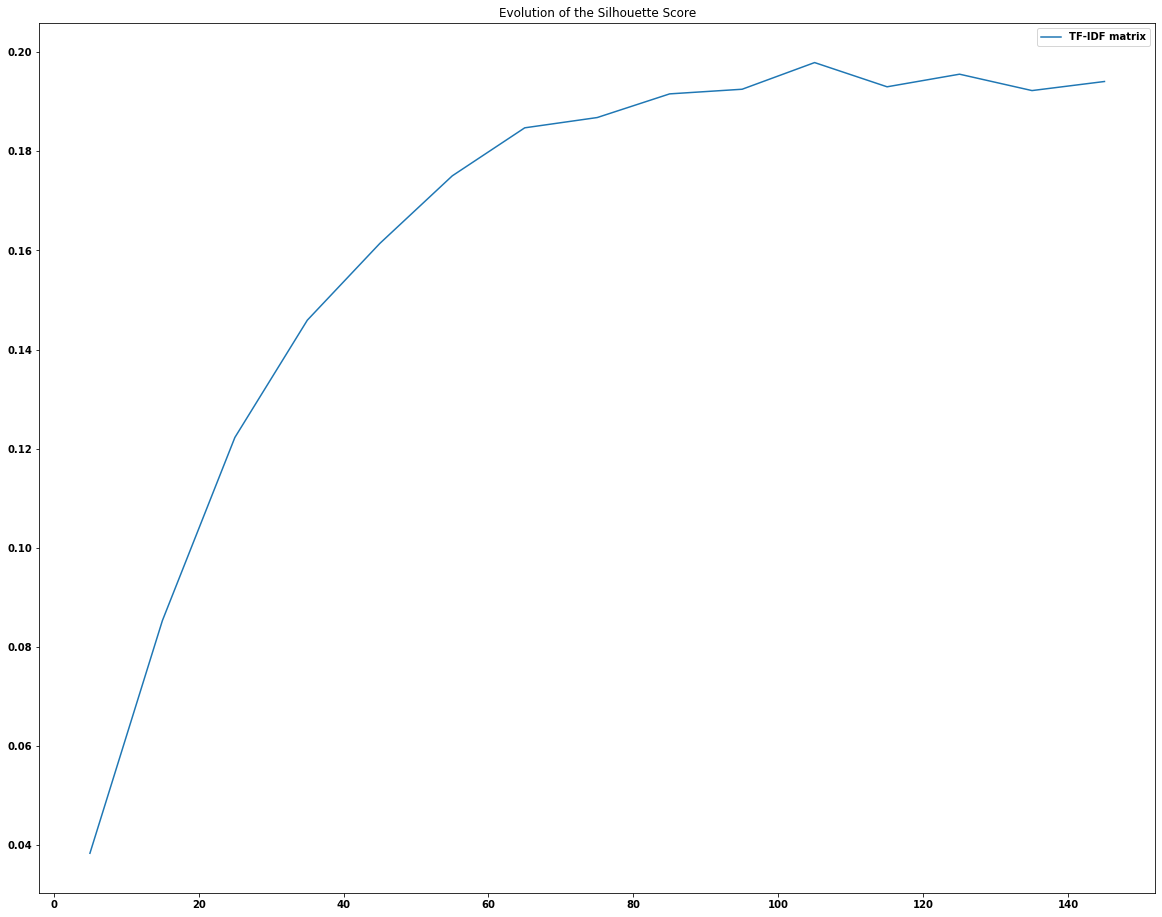

In [175]:
plt.figure(figsize=(20,16))

plt.subplot(1, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

Text(0.5, 1.0, 'ACP with 135 clusters')

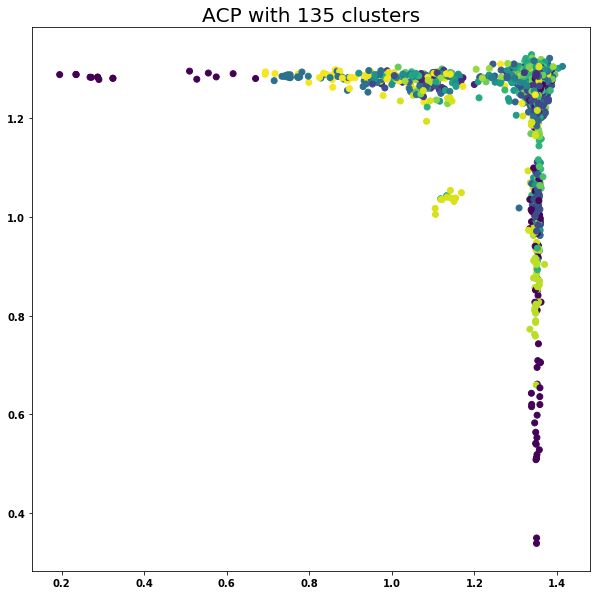

In [176]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

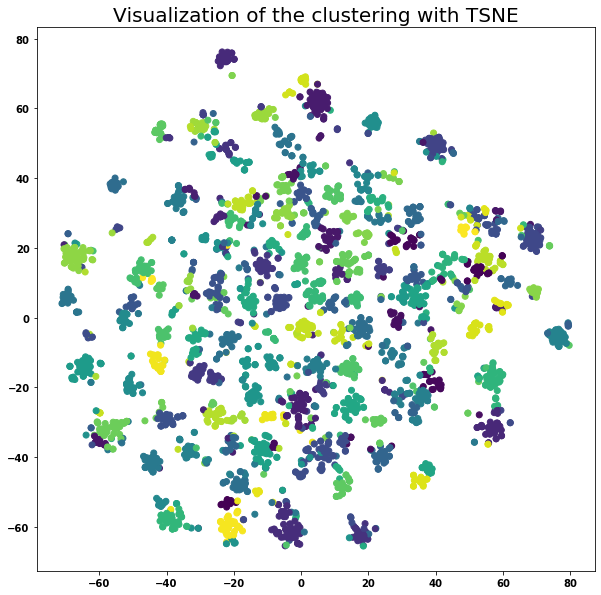

In [177]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

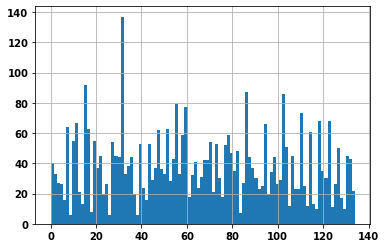

In [178]:
pd.Series(clusters).hist(bins=100)

<Figure size 432x288 with 0 Axes>

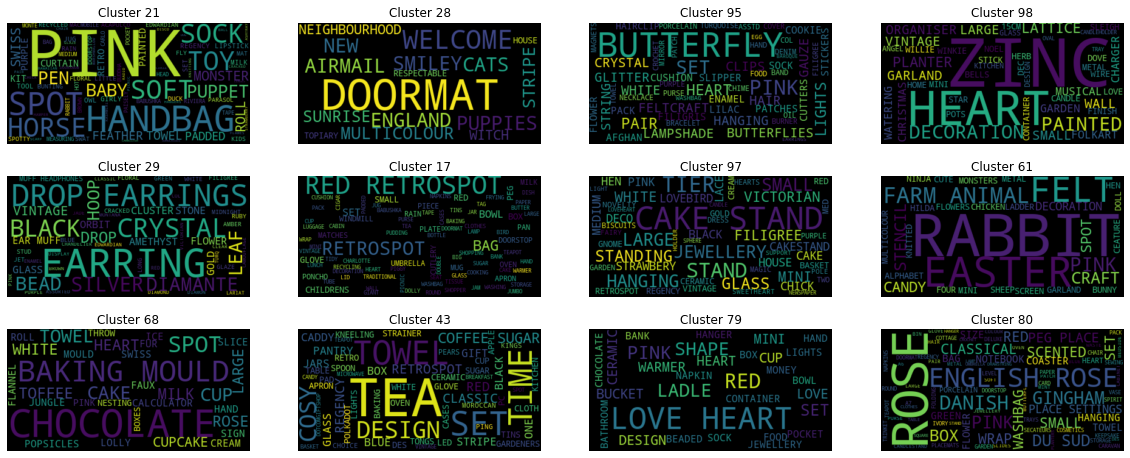

<Figure size 432x288 with 0 Axes>

In [179]:
import random
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(product[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

In [180]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(product, clusters)}
print(set(dict_article_to_cluster.values()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134}


In [181]:
# with open('product_clusters.pickle', 'wb') as h:
#     pickle.dump(dict_article_to_cluster, h)

In [182]:
cluster = dfCleaned['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(dfCleaned["TotalPrice"], 0)
df2 = pd.concat([dfCleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()
df2_grouped.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.68,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,17.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = lambda x:x.iloc[0]
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]


df_grouped = dfCleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [184]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [185]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)
df_grouped_final.columns = ["min", "max", "mean", "min_recency", "max_recency", "frequency", "monetary_value", "quantity", "country"]
df_grouped_final.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24


In [186]:
df2_grouped_final.head(5)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
12347,0.003132,0.0,0.0,0.009466,0.0,0.063258,0.0,0.006376,0.002923,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.007889,0.0,0.0
12348,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.011828,0.0,0.000000,0.0,0.0
12349,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.013379,0.027409,0.0,...,0.0,0.0,0.0,0.0,0.012144,0.000000,0.0,0.000000,0.0,0.0
12350,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [187]:
from sklearn.preprocessing import StandardScaler
X1 = df_grouped_final.as_matrix()
X2 = df2_grouped_final.as_matrix()

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [188]:
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.8943520307602384 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.8746555597106309 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.27181629236228416 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.26905155177585416 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.3167633031562987 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.4084304806006854 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.4143381940265089 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.412669510996189 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.4126559388829794 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.41447740356519247 with Std Scaling


In [189]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)  # random state just to be able to provide cluster number durint analysis
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

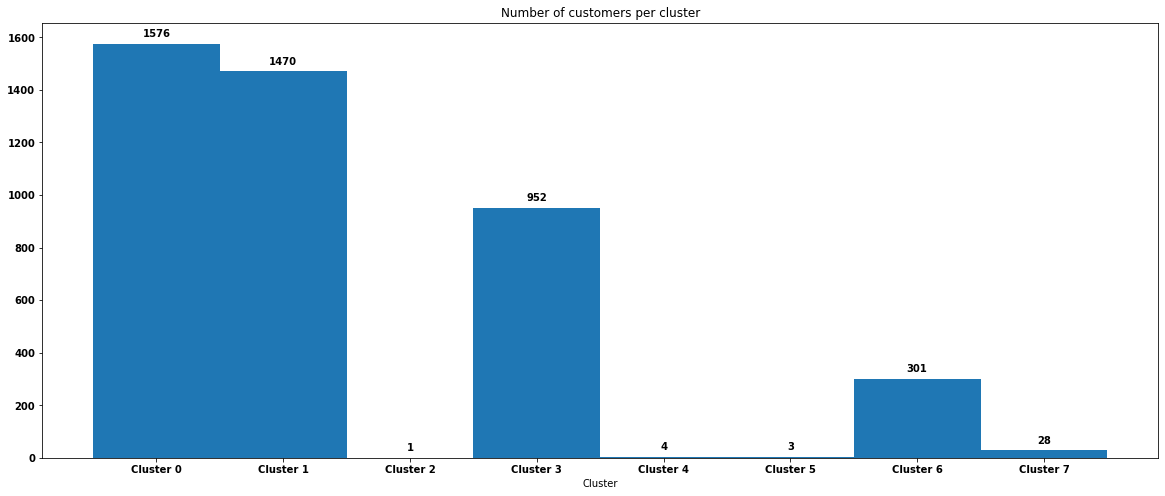

In [190]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [191]:
df_grouped_final["cluster"] = clusters

In [192]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,7,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,6,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.007889,0.0,0.0
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,6,...,0.0,0.0,0.0,0.0,0.000000,0.011828,0.0,0.000000,0.0,0.0
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,6,...,0.0,0.0,0.0,0.0,0.012144,0.000000,0.0,0.000000,0.0,0.0
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,3,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [193]:
final_dataset_V2 = final_dataset.reset_index()

In [194]:
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

In [195]:
# with open('df_cleaned.pickle', 'wb') as f:
#     pickle.dump(df_cleaned, f)

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

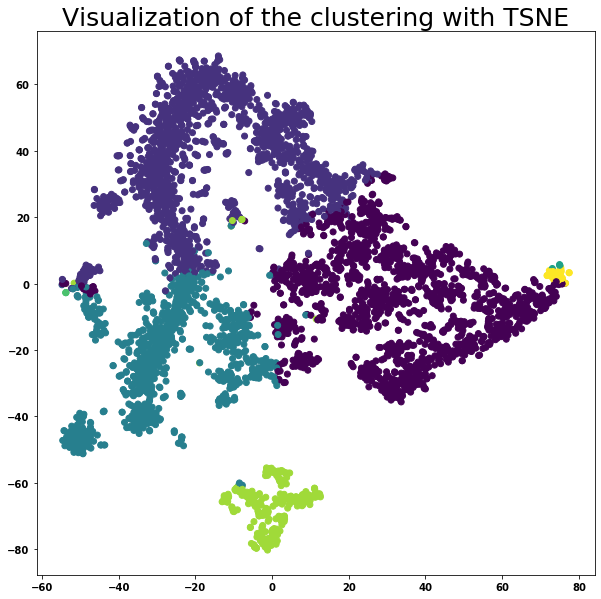

In [196]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

In [197]:
final_dataset[final_dataset['cluster']==0].head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12352,0.00,35.70,16.842857,36.0,296.0,7,1285.21,526,24,0,...,0.000000,0.000000,0.028478,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
12356,25.50,102.00,51.300000,22.0,325.0,3,2487.43,1573,26,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
12363,15.90,69.36,42.630000,109.0,242.0,2,552.00,408,36,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
12409,4.95,79.20,48.850000,78.0,182.0,3,11061.88,5551,32,0,...,0.009199,0.004475,0.000000,0.0,0.0,0.0,0.00000,0.061472,0.0,0.0
12421,9.90,30.00,18.225000,15.0,319.0,4,639.04,478,30,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.05164,0.000000,0.0,0.0


In [198]:
final_dataset[final_dataset['cluster']==0].mean()

min             11.729499
max             86.115216
mean            37.516787
min_recency     37.107868
max_recency    312.100888
                  ...    
Cluster_130      0.004515
Cluster_131      0.010080
Cluster_132      0.041169
Cluster_133      0.000219
Cluster_134      0.000611
Length: 145, dtype: float64

In [199]:
temp_final_df = final_dataset.reset_index()

In [200]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])

In [201]:
cluster0 = dfCleaned[dfCleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity              10.731105
UnitPrice              2.869304
QuantityCanceled       0.130352
TotalPrice            18.163699
frequency             11.114235
min_recency           25.162116
monetary_value      4526.330661
dtype: float64

In [202]:
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1368
JUMBO BAG RED RETROSPOT               1098
REGENCY CAKESTAND 3 TIER               985
PARTY BUNTING                          947
ASSORTED COLOUR BIRD ORNAMENT          937
LUNCH BAG RED RETROSPOT                904
LUNCH BAG  BLACK SKULL.                767
SET OF 3 CAKE TINS PANTRY DESIGN       723
LUNCH BAG PINK POLKADOT                681
LUNCH BAG CARS BLUE                    677
Name: Description, dtype: int64

In [203]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [204]:
cluster0_grouped['RFMScore'].value_counts()

111    370
211    155
322    122
222    119
122    100
321     83
221     69
311     64
112     49
121     45
323     45
223     43
212     43
332     38
333     37
233     30
312     22
123     20
232     20
133     20
334     19
234     15
132      7
134      6
231      5
411      4
324      4
213      3
224      3
113      3
422      2
331      2
412      2
124      2
421      1
114      1
424      1
313      1
414      1
Name: RFMScore, dtype: int64

In [205]:
cluster0_grouped['Country'].value_counts()

35    1540
30      13
32       7
26       6
31       2
25       2
24       2
23       2
36       1
29       1
Name: Country, dtype: int64

In [206]:
cluster0['Month'].value_counts()

11    31485
12    25734
10    23220
9     21765
5     18476
3     18232
8     16833
6     16334
7     16177
4     15856
1     14128
2     13248
Name: Month, dtype: int64

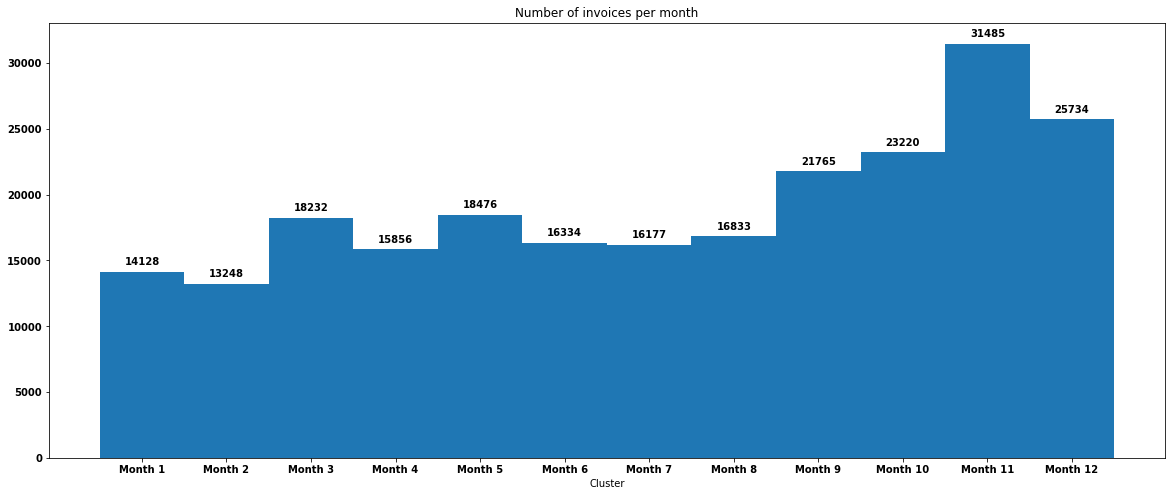

In [207]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [208]:
temp['Year'] = cluster0[cluster0['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

2010.0    1078
2011.0     404
Name: Year, dtype: int64

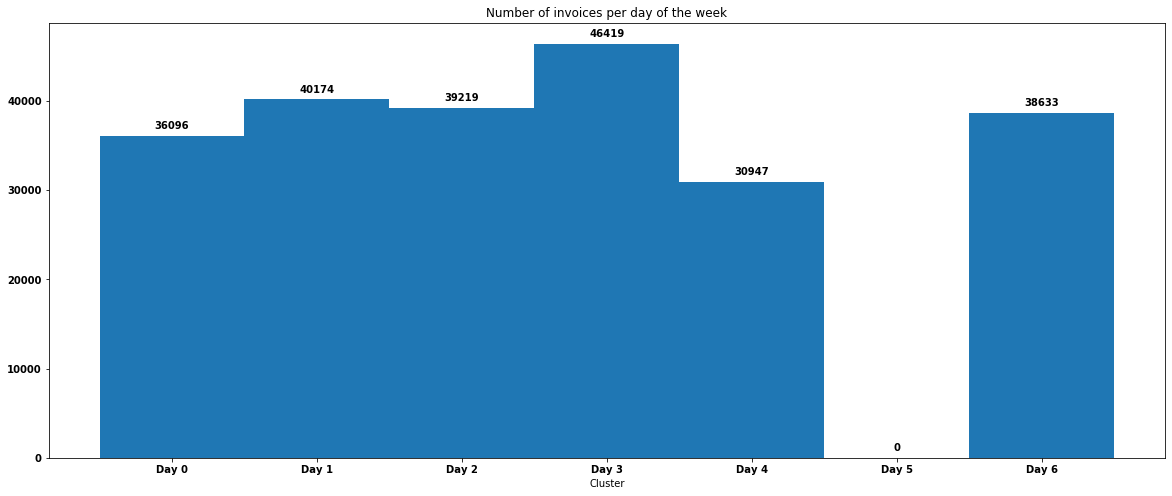

In [209]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Weekday'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

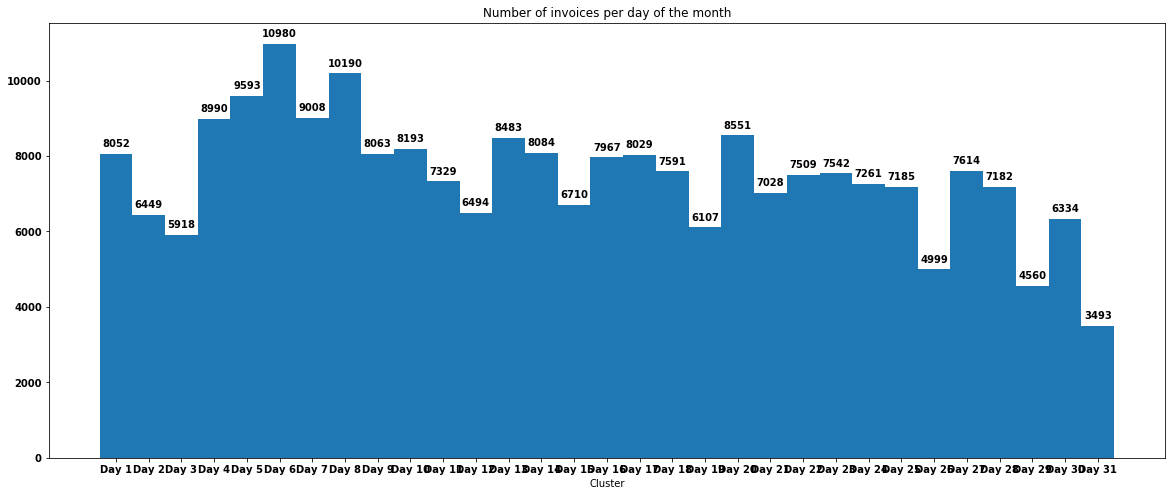

In [210]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day'], bins=31)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(1,32)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

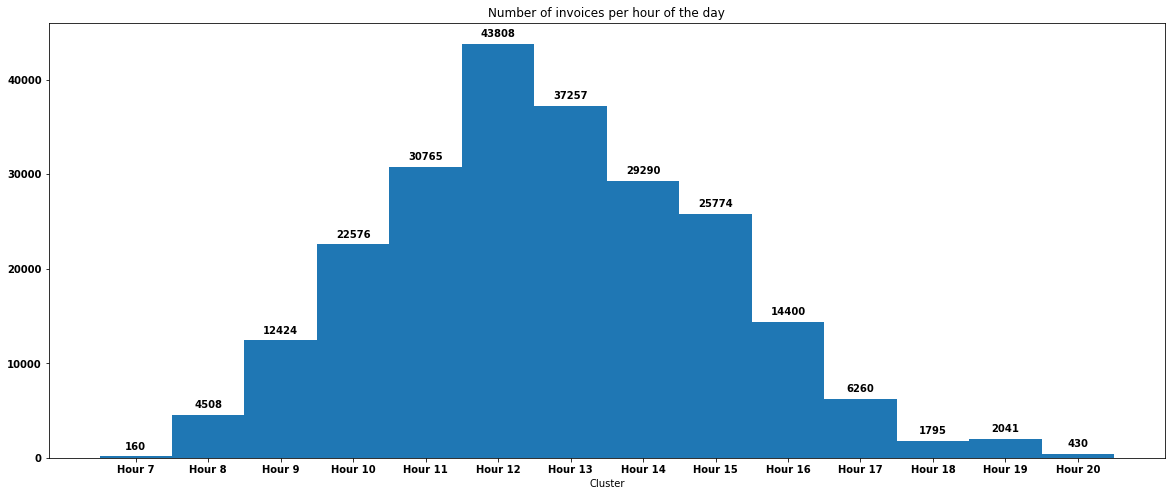

In [211]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Hour'], bins=14)
plt.xlabel("Cluster")
plt.title("Number of invoices per hour of the day")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Hour {}".format(x) for x in (sorted(cluster0['Hour'].unique()))])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

##### **3. Testing models for Prediction**

In [212]:
new_df = pd.read_csv("final_dataset_V2.csv")

In [213]:
new_df.head(5)

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1,12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.007889,0.0,0.0
2,12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.0,0.0,0.0,0.0,0.000000,0.011828,0.0,0.000000,0.0,0.0
3,12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.0,0.0,0.0,0.0,0.012144,0.000000,0.0,0.000000,0.0,0.0
4,12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [214]:
X = new_df.drop(columns=['CustomerID', 'cluster']) 
y = new_df['cluster'].values

In [215]:
scaler = StandardScaler() # create scaler object

X_scaled = scaler.fit_transform(X)

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0) # Do 80/20 split

##### **3.1 Testing Classic Models**

##### **3.1.1 Baseline**

In [217]:
from sklearn.dummy import DummyClassifier

In [218]:
dummy_biased = DummyClassifier(random_state=0)

dummy_biased.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [219]:
print("Baseline accuracy", (dummy_biased.score(X_test, y_test))*100)

Baseline accuracy 29.411764705882355


##### **3.1.2 Linear Models**

In [220]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [221]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("LogisticRegression_classifier accuracy:", (lr.score(X_test, y_test))*100)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_classifier accuracy: 94.23298731257209


In [222]:
# SGD Classifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
print("SGDClassifier accuracy:", (SGD.score(X_test, y_test))*100)

SGDClassifier accuracy: 93.88696655132641


##### **3.1.3 SVM**

In [223]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
print("LinearSVC accuracy:", (svc.score(X_test, y_test))*100)

LinearSVC accuracy: 93.19492502883506


C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### **3.2 Random Forest**

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [225]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000)

In [226]:
param_grid = { 
    'n_estimators' : [100, 500, 1000],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6],
    'criterion' :['gini', 'entropy']
}

In [227]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000, criterion='entropy', max_depth=6, max_features='auto')

In [228]:
rfc.fit(X_train, y_train)
print("Accuracy for Random Forest Classifier:", (rfc.score(X_test, y_test)*100))

Accuracy for Random Forest Classifier: 92.38754325259517


In [229]:
y_pred = rfc.predict(X_test)

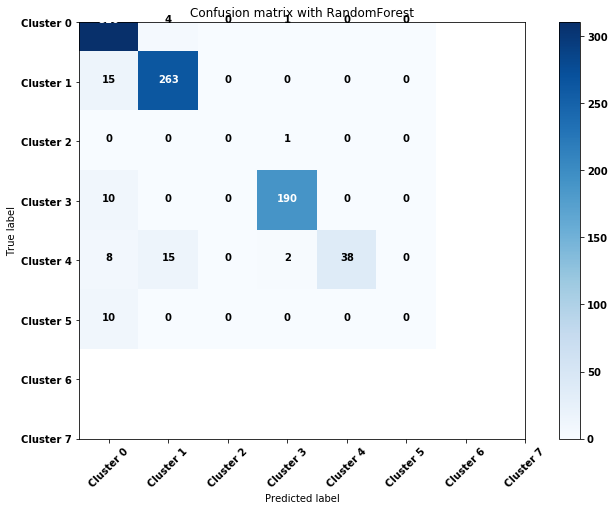

In [230]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ["Cluster {}".format(x) for x in range(8)]

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with RandomForest')

##### **3.3 XGBOOST**

In [231]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 0, learning_rate = 0.01, 
                                   objective = 'multi:softprob', n_estimators = 1000,
                                  colsample_bytree = 0.6, gamma = 0.5, max_depth = 7,
                                  min_child_weight = 1, subsample=0.8, n_jobs=-1, scoring='accuracy')

In [232]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='accuracy',
              seed=None, silent=None, subsample=0.8, verbosity=1)

In [233]:
print("Accuracy for XGBoost : ", (model.score(X_test, y_test))*100)

Accuracy for XGBoost :  97.92387543252595


In [234]:
y_pred = model.predict(X_test)

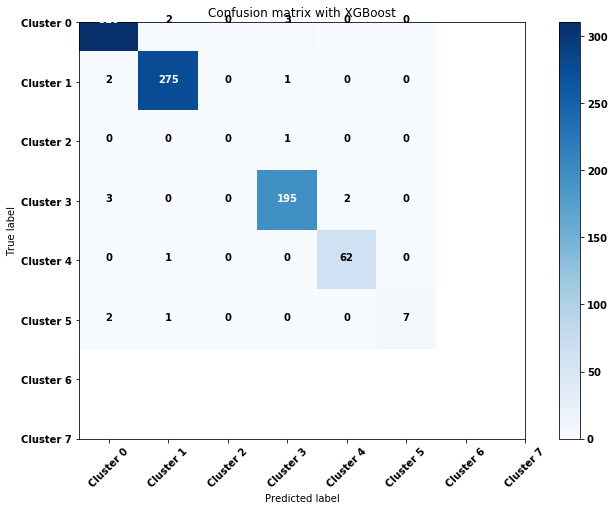

In [235]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')

In [17]:
dfCleaned.loc[100]

InvoiceNo                                    536378
StockCode                                    84519A
Description         TOMATO CHARLIE+LOLA COASTER SET
Quantity                                          6
InvoiceDate                     2010-12-01 09:37:00
UnitPrice                                      2.95
CustomerID                                    14688
Country                              United Kingdom
QuantityCanceled                                  0
Name: 100, dtype: object